In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
plt.style.use("ggplot")

2022-12-09 19:00:19.626533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


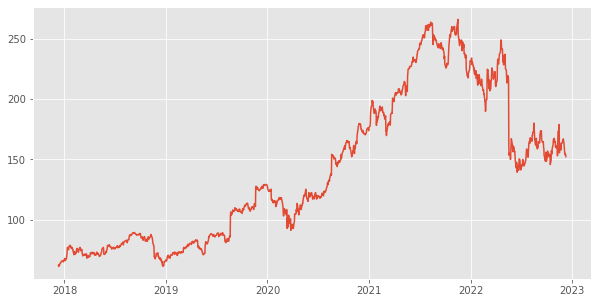

In [2]:
ticker = "TGT"
data = pdr.get_data_yahoo(ticker)
plt.figure(figsize=(10,5))
plt.plot(data['Close'])

In [3]:
close = data["Close"].values
training_data_len = math.ceil(len(close) * 0.8)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(close.reshape(-1, 1))
train = data_scaled[:training_data_len, :]

In [4]:
X_train = []
y_train = []
for i in range(60, len(train)):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
test = data_scaled[training_data_len - 60:, :]
X_test =[]
y_test = close[training_data_len:]
for i in range(60, len(test)):
    X_test.append(test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer="Adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=100, batch_size=32)

2022-12-09 19:00:29.390285: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
30/30 [==============================] - 24s 132ms/step - loss: 0.0326
Epoch 2/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0060
Epoch 3/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0039
Epoch 4/100
30/30 [==============================] - 4s 131ms/step - loss: 0.0042
Epoch 5/100
30/30 [==============================] - 4s 140ms/step - loss: 0.0037
Epoch 6/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0039
Epoch 7/100
30/30 [==============================] - 5s 152ms/step - loss: 0.0039
Epoch 8/100
30/30 [==============================] - 6s 186ms/step - loss: 0.0048
Epoch 9/100
30/30 [==============================] - 4s 143ms/step - loss: 0.0036
Epoch 10/100
30/30 [==============================] - 4s 129ms/step - loss: 0.0038
Epoch 11/100
30/30 [==============================] - 4s 130ms/step - loss: 0.0030
Epoch 12/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0034
Epoch 13/100

In [7]:
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)
rmse = np.sqrt(np.mean(prediction - y_test) ** 2)
rmse

8/8 [==============================] - 4s 32ms/step


7.239657276655098

/var/folders/wp/5vvxp1fd6n59wfjszdqtm67r0000gn/T/ipykernel_38836/1424064798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["Predictions"] = prediction
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


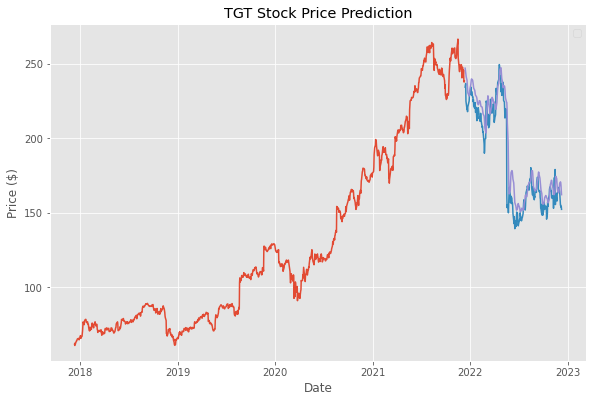

In [10]:

data = data.filter(["Close"])
train = data[:training_data_len]
validation = data[training_data_len:]
validation["Predictions"] = prediction
plt.figure(figsize=(9.6, 6.2))
plt.title("{} Stock Price Prediction".format(ticker))
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.plot(train)
plt.plot(validation[["Close", "Predictions"]])
plt.legend()
plt.show()